In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from array import array

read_dset = pd.read_csv('Datasets/agricultural_lands_dataset.csv')
read_dset = read_dset[(read_dset['Country Name'] == 'India') | (read_dset['Country Name'] == 'Philippines')]

read_dump = array('i', [])
read_phDt = array('f', [])
read_inDt = array('f', [])
read_year = array('i', [])

# Dropping columns that is unneccessary or does not contain any usable data.
drp_landD = ['Country Name', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972'
                , '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986'
                , '1987', '1988', '1989', '1990']

read_dset = read_dset.drop(labels=drp_landD, axis=1)

for land_index, land_value in enumerate(read_dset.columns):
    read_year.append(int(land_value))
    for land_items in read_dset[land_value].items():
        if land_index in read_dump:
            read_phDt.append(float(land_items[1]))
        else:
            read_inDt.append(float(land_items[1]))
            read_dump.append(land_index)
            

print(read_phDt)
print(read_year)

array('f', [37.418251037597656, 37.27739334106445, 37.109703063964844, 36.942012786865234, 36.942012786865234, 37.24385452270508, 38.01522445678711, 37.847537994384766, 37.679847717285156, 37.67649459838867, 37.50880432128906, 37.34446716308594, 37.696617126464844, 38.467987060546875, 38.08230209350586, 38.83690643310547, 39.541202545166016, 40.27903366088867, 40.580875396728516, 40.580875396728516, 41.11748504638672, 41.68762969970703, 41.818424224853516, 41.915687561035156, 42.01294708251953, 42.110206604003906, 42.20746612548828, 42.304725646972656, 42.40198516845703, 42.509307861328125])
array('i', [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])


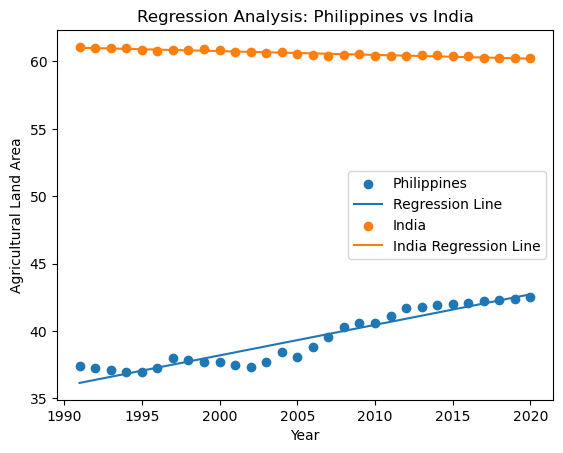

In [38]:
# Perform regression analysis
coeff_philippines = np.polyfit(read_year, read_phDt, 1)  # Fit a linear regression line
regression_philippines = np.polyval(coeff_philippines, read_year)  # Generate the regression line

coeff_india = np.polyfit(read_year, read_inDt, 1)  # Fit a linear regression line
regression_india = np.polyval(coeff_india, read_year)  # Generate the regression line


# Plotting regression analysis
plt.scatter(read_year, read_phDt, label='Philippines')
plt.plot(read_year, regression_philippines, label='Regression Line')

plt.scatter(read_year, read_inDt, label='India')
plt.plot(read_year, regression_india, label='India Regression Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Agricultural Land Area')
plt.title('Regression Analysis: Philippines vs India')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [42]:
import pandas as pd

# Create a pandas DataFrame with the given data
data = {
    'Year': [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'India': [0.1599999964237213, 0.12999999523162842, 0.11999999731779099, 0.10999999940395355, 0.10999999940395355, 0.09000000357627869, 0.09000000357627869, 0.07999999821186066, 0.07999999821186066, 0.07000000029802322, 0.07999999821186066, 0.07000000029802322, 0.07000000029802322, 0.10000000149011612, 0.05999999865889549, 0.10000000149011612, 0.07999999821186066, 0.07000000029802322, 0.07000000029802322, 0.07999999821186066, 0.07999999821186066, 0.07999999821186066, 0.07999999821186066, 0.15000000596046448],
    'Philippines': [0.6899999976158142, 0.6499999761581421, 0.6100000143051147, 0.5799999833106995, 0.550000011920929, 0.5299999713897705, 0.5099999904632568, 0.49000000953674316, 0.4699999988079071, 0.46000000834465027, 0.4399999976158142, 0.4300000071525574, 0.41999998688697815, 0.4099999964237213, 0.4000000059604645, 0.38999998569488525, 0.3799999952316284, 0.3799999952316284, 0.3700000047683716, 0.36000001430511475, 0.36000001430511475, 0.3499999940395355, 0.3499999940395355, 0.3400000035762787]
}

arrx = [10000, 12000, 9500, 11500, 10200]
df = pd.DataFrame(data)

# Calculate skewness for each country
skewness_india = df['India'].skew()
skewness_philippines = df['Philippines'].skew()

# Print the skewness values
print("Skewness for India: {:.2f}".format(skewness_india))
print("Skewness for Philippines: {:.2f}".format(skewness_philippines))


Skewness for India: 1.33
Skewness for Philippines: 0.92


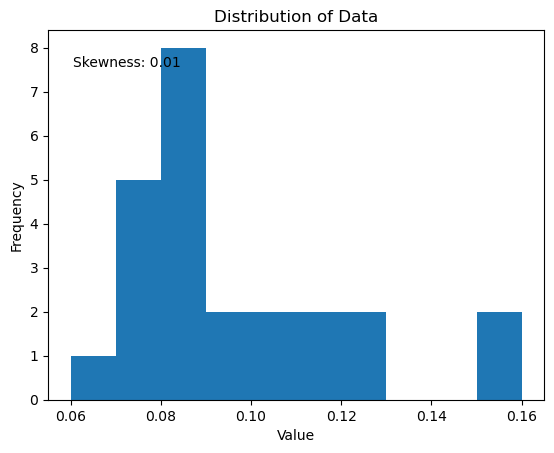

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

# Plot histogram
plt.hist(data, bins=10)

# Calculate skewness
skewness = np.mean(data) - np.median(data)

# Add skewness text
plt.text(0.05, 0.9, f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data')

# Show the plot
plt.show()


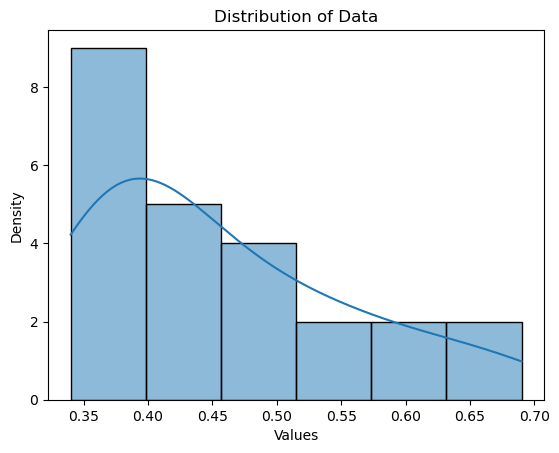

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data
data = np.array([0.6899999976158142, 0.6499999761581421, 0.6100000143051147, 0.5799999833106995, 0.550000011920929, 0.5299999713897705, 0.5099999904632568, 0.49000000953674316, 0.4699999988079071, 0.46000000834465027, 0.4399999976158142, 0.4300000071525574, 0.41999998688697815, 0.4099999964237213, 0.4000000059604645, 0.38999998569488525, 0.3799999952316284, 0.3799999952316284, 0.3700000047683716, 0.36000001430511475, 0.36000001430511475, 0.3499999940395355, 0.3499999940395355, 0.3400000035762787])

# Plot histogram with density curve
sns.histplot(data, kde=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data')

# Show the plot
plt.show()


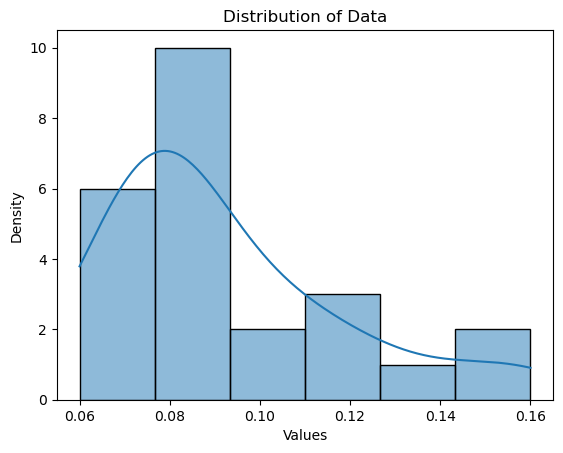

In [49]:
# Sample data
datea = np.array([0.1599999964237213, 0.12999999523162842, 0.11999999731779099, 0.10999999940395355, 0.10999999940395355, 0.09000000357627869, 0.09000000357627869, 0.07999999821186066, 0.07999999821186066, 0.07000000029802322, 0.07999999821186066, 0.07000000029802322, 0.07000000029802322, 0.10000000149011612, 0.05999999865889549, 0.10000000149011612, 0.07999999821186066, 0.07000000029802322, 0.07000000029802322, 0.07999999821186066, 0.07999999821186066, 0.07999999821186066, 0.07999999821186066, 0.15000000596046448])

# Plot histogram with density curve
sns.histplot(datea, kde=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data')

# Show the plot
plt.show()

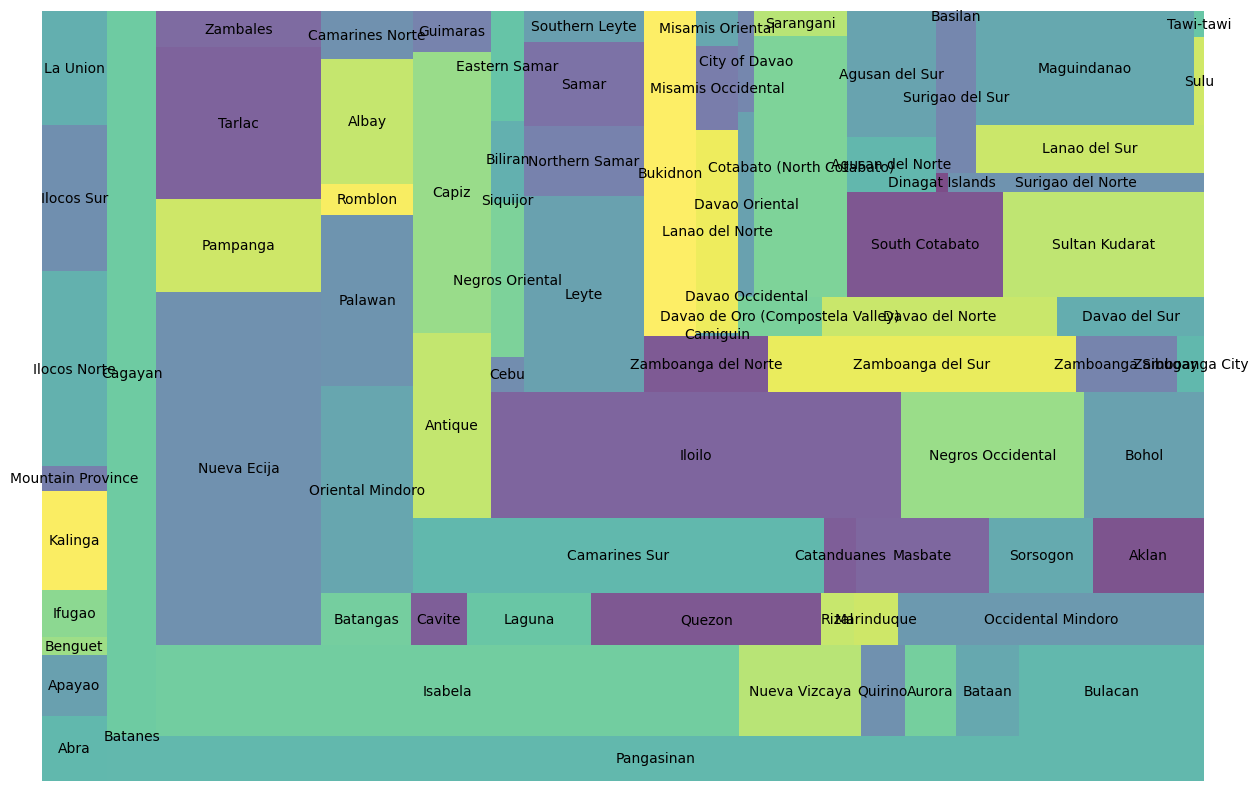

['Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga', 'Mountain Province', 'Ilocos Norte', 'Ilocos Sur', 'La Union', 'Pangasinan', 'Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya', 'Quirino', 'Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija', 'Pampanga', 'Tarlac', 'Zambales', 'Batangas', 'Cavite', 'Laguna', 'Quezon', 'Rizal', 'Marinduque', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Romblon', 'Albay', 'Camarines Norte', 'Camarines Sur', 'Catanduanes', 'Masbate', 'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo', 'Negros Occidental', 'Bohol', 'Cebu', 'Negros Oriental', 'Siquijor', 'Biliran', 'Eastern Samar', 'Leyte', 'Northern Samar', 'Samar', 'Southern Leyte', 'Zamboanga del Norte', 'Zamboanga del Sur', 'Zamboanga Sibugay', 'Zamboanga City', 'Bukidnon', 'Camiguin', 'Lanao del Norte', 'Misamis Occidental', 'Misamis Oriental', 'Davao de Oro (Compostela Valley)', 'Davao del Norte', 'Davao del Sur', 'Davao Occidental', 'Davao Oriental', 'City of Davao', 'Cotabato (North Cotab

In [10]:
import matplotlib.pyplot as plt
import squarify

labels = ['Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga', 'Mountain Province', 'Ilocos Norte', 'Ilocos Sur', 'La Union', 'Pangasinan', 'Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya', 'Quirino', 'Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija', 'Pampanga', 'Tarlac', 'Zambales', 'Batangas', 'Cavite', 'Laguna', 'Quezon', 'Rizal', 'Marinduque', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Romblon', 'Albay', 'Camarines Norte', 'Camarines Sur', 'Catanduanes', 'Masbate', 'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo', 'Negros Occidental', 'Bohol', 'Cebu', 'Negros Oriental', 'Siquijor', 'Biliran', 'Eastern Samar', 'Leyte', 'Northern Samar', 'Samar', 'Southern Leyte', 'Zamboanga del Norte', 'Zamboanga del Sur', 'Zamboanga Sibugay', 'Zamboanga City', 'Bukidnon', 'Camiguin', 'Lanao del Norte', 'Misamis Occidental', 'Misamis Oriental', 'Davao de Oro (Compostela Valley)', 'Davao del Norte', 'Davao del Sur', 'Davao Occidental', 'Davao Oriental', 'City of Davao', 'Cotabato (North Cotabato)', 'Sarangani', 'South Cotabato', 'Sultan Kudarat', 'Agusan del Norte', 'Agusan del Sur', 'Dinagat Islands', 'Surigao del Norte', 'Surigao del Sur', 'Basilan', 'Lanao del Sur', 'Maguindanao', 'Sulu', 'Tawi-tawi']
values = [1399477.25, 1302611.875, 398760.625, 1001710.9375, 2127968.5, 535851.5625, 4184465.25, 3138606.0, 2459146.75, 16290590.0, 1409.280029296875, 11985204.0, 17551708.0, 3650728.5, 1334579.875, 1526360.25, 1894772.0, 5591557.5, 19350154.0, 5092881.5, 8294581.5, 1964870.625, 1543330.75, 965574.8125, 2150840.5, 3977064.0, 565461.5625, 760120.8125, 5293469.5, 6272008.0, 5191140.0, 932476.5625, 3778291.25, 1458978.0, 10258514.0, 808764.3125, 3320460.0, 2599462.0, 2771237.0, 4806466.0, 7270376.0, 1072395.625, 17149206.0, 7661980.0, 5028428.0, 382574.625, 1698602.0, 59483.140625, 843964.0, 1211237.0, 7767872.0, 2785573.25, 3341174.0, 1229413.125, 2285033.75, 5685334.5, 1849984.25, 511130.25, 5628853.5, 45395.5, 2827984.0, 1162183.875, 492331.25, 1088762.0, 3070561.25, 1918822.0, 5948.740234375, 995572.0, 544692.0, 7987508.0, 777237.3125, 5442230.0, 7020279.5, 1617122.5, 3715172.0, 79046.7578125, 1629960.875, 1996903.75, 137387.953125, 3609324.0, 8256773.5, 285808.0, 84660.0]

plt.figure(figsize=(15, 10))
squarify.plot(sizes=values, label=labels, alpha=0.7)
plt.axis('off')
plt.show()

print(labels, '\n')